# 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

# 필요한 함수 정의

In [80]:
# 변수 중요도 plot
def plot_feature_importance(importance, names, topn = 'all'):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    return fi_df

# 데이터 로딩하기

In [3]:
# data data
path = "./data/attrition2.csv"
data = pd.read_csv(path)
data.head(10)

,Attrition,Age,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,0,28,Research & Development,1,3,Medical,Female,Research Scientist,1,Married,3591,1,3,3,3,3,3
1,1,37,Research & Development,2,2,Other,Male,Laboratory Technician,3,Single,2090,6,2,7,3,3,0
2,0,27,Research & Development,8,5,Life Sciences,Male,Laboratory Technician,3,Married,4621,1,4,3,4,3,3
3,0,18,Research & Development,1,3,Life Sciences,Female,Laboratory Technician,4,Single,1611,1,3,0,5,4,0
4,0,29,Research & Development,9,3,Life Sciences,Male,Research Scientist,3,Married,2451,6,1,5,2,2,1
5,0,44,Research & Development,2,1,Medical,Male,Manufacturing Director,3,Single,10209,5,2,16,2,2,2
6,0,41,Sales,10,2,Life Sciences,Male,Sales Executive,4,Single,6230,7,4,16,3,3,14
7,0,25,Sales,18,1,Life Sciences,Male,Sales Executive,3,Married,6232,2,2,6,3,2,3
8,0,50,Research & Development,2,3,Medical,Male,Research Director,3,Married,17639,5,4,30,3,3,4
9,0,47,Sales,4,2,Life Sciences,Female,Sales Executive,4,Single,4163,1,3,9,0,3,9


|	변수 명	|	내용	|	구분	|  
|	----	|	----	|	----	|  
|	**Attrition**	|	이직여부, Yes = 1 , No = 0	|	**Target**	|  
|	Age	|	나이	|	숫자	|  
|	BusinessTravel	|	출장 빈도(범주)	|		|  
|	Department	|	현 부서	|		|  
|	DistanceFromHome	|	집-직장 거리(마일)	|	숫자	|  
|	Education	|	교육수준(범주)	|	1 Below College, 2 College, 3 Bachelor, 4 Master, 5 Doctor	|  
|	EducationField	|	전공	|		|  
|	EnvironmentSatisfaction	|	근무환경에 대한 만족도(범주)	|	1 Low, 2 Good, 3 Excellent, 4 Outstanding	|  
|	Gender	|	성별	|		|  
|	JobInvolvement	|	직무 적극성(참여도)	|	1 Low, 2 Medium, 3 High, 4 Very High	|  
|	JobRole	|	직무	|		|  
|	JobSatisfaction	|	직무 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|  
|	MaritalStatus	|	결혼상태	|		|  
|	MonthlyIncome	|	월급	|	숫자	|  
|	NumCompaniesWorked	|	현재까지 근무한 회사 수	|	숫자	|  
|	PercentSalaryHike	|	전년대비 급여인상율(%)	|	숫자	|  
|	RelationshipSatisfaction	|	동료와의 관계 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|  
|	StockOptionLevel	|	스톡옵션 수준 0~3	|	범주	|  
|	TotalWorkingYears	|	총 근무 연수	|	숫자	|  
|	TrainingTimesLastYear	|	전년 교육훈련 횟수	|	숫자	|  
|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	1 Bad, 2 Good, 3 Better, 4 Best	|  
|	YearsAtCompany	|	현직장 근무 연수	|	숫자	|  
|	YearsInCurrentRole	|	현직무 연수	|	숫자	|  
|	YearsWithCurrManager	|	현 팀장과 근무한 연수	|	숫자	|  


##### x,y 데이터 나누기

In [4]:
target = 'Attrition'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [5]:
y.value_counts(normalize = True)

0    0.913043
1    0.086957
Name: Attrition, dtype: float64

##### 가변수화

In [7]:
dummy_vars = ['Department','EducationField','Gender','JobRole','MaritalStatus'] # 가변수화 대상 변수 이름 리스트 만든다
x = pd.get_dummies(x, columns = dummy_vars, drop_first=True)

##### 데이터 분할하기

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# train_val에서 train : val = 8 : 2
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 20)

In [11]:
print(x_train.shape, x_val.shape)

(920, 29) (230, 29)


##### 데이터 불균형 처리하기 : class balance를 맞추기 위한 resampling

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
smote = SMOTE()
sm_x_train, sm_y_train = smote.fit_resample(x_train, y_train)

print(np.bincount(sm_y_train))
print(np.bincount(sm_y_train) / sm_y_train.shape[0])

[842 842]
[0.5 0.5]


# 모델링

## 라이브러리 불러오기

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report

## Decision Tree

##### 모델 생성

In [70]:
# depth의 범위 1~20까지 안에서 그리드서치로 튜닝
params = {'max_depth':range(1,20)}

DT_model = DecisionTreeClassifier()
DT_model_gs = GridSearchCV(DT_model, params, cv=50)

DT_model_gs.fit(sm_x_train, sm_y_train)

GridSearchCV(cv=50, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 20)})

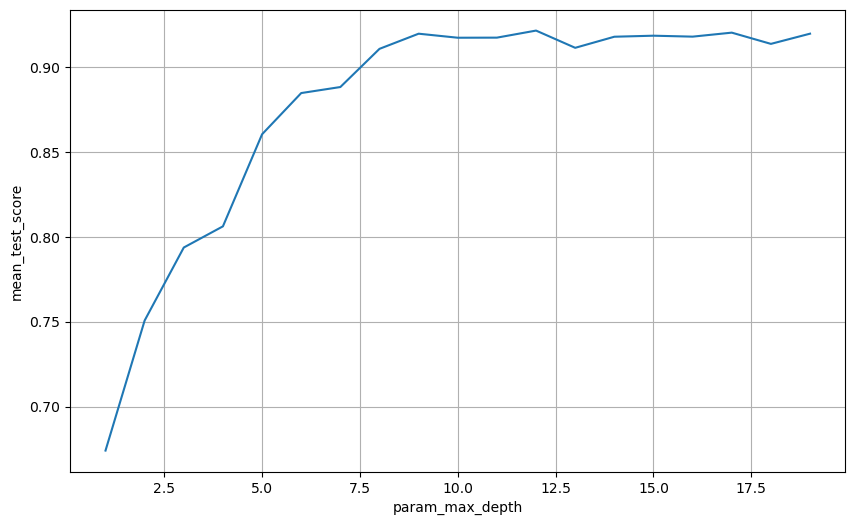

In [71]:
# 튜닝 과정 로그를 df로 저장 한다.
result = pd.DataFrame(DT_model_gs.cv_results_)

# 튜닝 결과를 그래프로 그려보자.
plt.figure(figsize = (10,6))
sns.lineplot(x='param_max_depth', y='mean_test_score', data = result)
plt.grid()
plt.show()

##### 최적화 된 모델 설정하기

In [72]:
DT_best_model = DT_model_gs.best_estimator_

DT_best_model

DecisionTreeClassifier(max_depth=12)

##### 최적화 된 모델 평가

In [73]:
# pred = model_gs.predict(x_val)
pred = DT_best_model.predict(x_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       208
           1       0.06      0.09      0.07        22

    accuracy                           0.77       230
   macro avg       0.48      0.47      0.47       230
weighted avg       0.82      0.77      0.79       230



## Random Forest

In [53]:
# 기본값으로 모델을 생성합니다.
RF_model = RandomForestClassifier()
RF_model.fit(sm_x_train, sm_y_train)

RandomForestClassifier()

In [54]:
fi = sm_x_train.iloc[0:0]
for i in range(100) :
    fi.loc[i] = RF_model.estimators_[i].feature_importances_


In [55]:
fi

,Age,DistanceFromHome,Education,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.060615,0.027392,0.100362,0.009590,0.068657,0.036599,0.099702,0.025001,0.074240,0.029724,...,0.005206,0.009403,0.000000,0.026487,0.004257,0.019857,0.003517,0.000000,0.189003,0.007919
1,0.057794,0.029085,0.138039,0.031045,0.040309,0.026285,0.058830,0.106108,0.046720,0.096247,...,0.009560,0.013269,0.000371,0.019376,0.001189,0.030526,0.000000,0.001618,0.026954,0.002966
2,0.059661,0.061133,0.043013,0.054240,0.058642,0.025929,0.062058,0.095577,0.012447,0.047475,...,0.034427,0.007757,0.004791,0.002022,0.000000,0.007711,0.094582,0.016185,0.070434,0.009509
3,0.180809,0.045016,0.046912,0.036203,0.103382,0.018254,0.030934,0.064158,0.038381,0.020395,...,0.024386,0.003330,0.007758,0.011698,0.017068,0.045721,0.042650,0.004203,0.022375,0.000335
4,0.063741,0.041227,0.074748,0.042593,0.083187,0.019351,0.068290,0.048958,0.016279,0.026398,...,0.001900,0.000000,0.000000,0.005002,0.006537,0.001584,0.022333,0.006348,0.172497,0.007190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.056579,0.057821,0.037775,0.065468,0.142561,0.027971,0.111555,0.042577,0.027158,0.019280,...,0.000000,0.003504,0.002248,0.021874,0.000000,0.013164,0.005330,0.000562,0.112773,0.004161
96,0.047874,0.034216,0.017176,0.068363,0.070411,0.016927,0.046988,0.112999,0.044274,0.016162,...,0.005333,0.001548,0.011938,0.000000,0.000000,0.021767,0.011186,0.002289,0.124112,0.024277
97,0.053641,0.031566,0.116775,0.084129,0.116441,0.026069,0.048796,0.052671,0.033403,0.045501,...,0.001987,0.008402,0.000000,0.004263,0.000097,0.029867,0.004099,0.012503,0.103201,0.010270
98,0.038670,0.034121,0.047655,0.039852,0.140986,0.040657,0.080317,0.043352,0.027625,0.025083,...,0.017680,0.000000,0.040753,0.003587,0.000000,0.031121,0.103093,0.006191,0.075068,0.003578


In [56]:
fi.mean(axis = 0)

Age                                  0.069588
DistanceFromHome                     0.041644
Education                            0.057070
JobSatisfaction                      0.043515
MonthlyIncome                        0.133478
NumCompaniesWorked                   0.034050
RelationshipSatisfaction             0.064760
TotalWorkingYears                    0.055742
TrainingTimesLastYear                0.049384
WorkLifeBalance                      0.038227
YearsAtCompany                       0.047658
Department_Research & Development    0.043574
Department_Sales                     0.019905
EducationField_Life Sciences         0.032587
EducationField_Marketing             0.010746
EducationField_Medical               0.047397
EducationField_Other                 0.008228
EducationField_Technical Degree      0.010382
Gender_Male                          0.017070
JobRole_Human Resources              0.007852
JobRole_Laboratory Technician        0.007370
JobRole_Manager                   

In [57]:
fi_rf = {}

for i, v in enumerate(list(x)) :
    fi_rf[v] = RF_model.feature_importances_[i]

pd.DataFrame(fi_rf, index = [0])

,Age,DistanceFromHome,Education,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.069588,0.041644,0.05707,0.043515,0.133478,0.03405,0.06476,0.055742,0.049384,0.038227,...,0.007852,0.00737,0.005242,0.010177,0.003124,0.029837,0.015317,0.003852,0.082397,0.009826


##### 모델 평가

In [59]:
pred = RF_model.predict(x_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       208
           1       0.25      0.14      0.18        22

    accuracy                           0.88       230
   macro avg       0.58      0.55      0.56       230
weighted avg       0.85      0.88      0.86       230



## XGB

In [66]:
params = {'max_depth':range(1,8,2), 'learning_rate':[0.01, 0.05, 0.1, 0.2], 'n_estimators':range(50,151,20)}

GS_XGB_model = GridSearchCV(XGBClassifier(), params, cv=3)
GS_XGB_model.fit(sm_x_train, sm_y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': range(1, 8, 2),
                         'n_estimators': range(50, 151, 20)})

##### 최적화 된 모델 설정하기

In [75]:
XGB_best_model = GS_XGB_model.best_estimator_

XGB_best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=70, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

##### 최적화 된 모델  평가

In [77]:
pred = XGB_best_model.predict(x_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       208
           1       0.31      0.18      0.23        22

    accuracy                           0.88       230
   macro avg       0.61      0.57      0.58       230
weighted avg       0.86      0.88      0.87       230



# 모델 성능 비교하기

In [78]:
from sklearn.metrics import accuracy_score

In [76]:
pred1 = DT_best_model.predict(x_val)
pred2 = RF_model.predict(x_val)
pred3 = XGB_best_model.predict(x_val)

In [79]:
print(accuracy_score(y_val, pred1)) # Decision Tree
print(accuracy_score(y_val, pred2)) # Random Forest
print(accuracy_score(y_val, pred3)) # XGB

0.7695652173913043
0.8782608695652174
0.8826086956521739


# 모델간 변수 중요도 비교하기

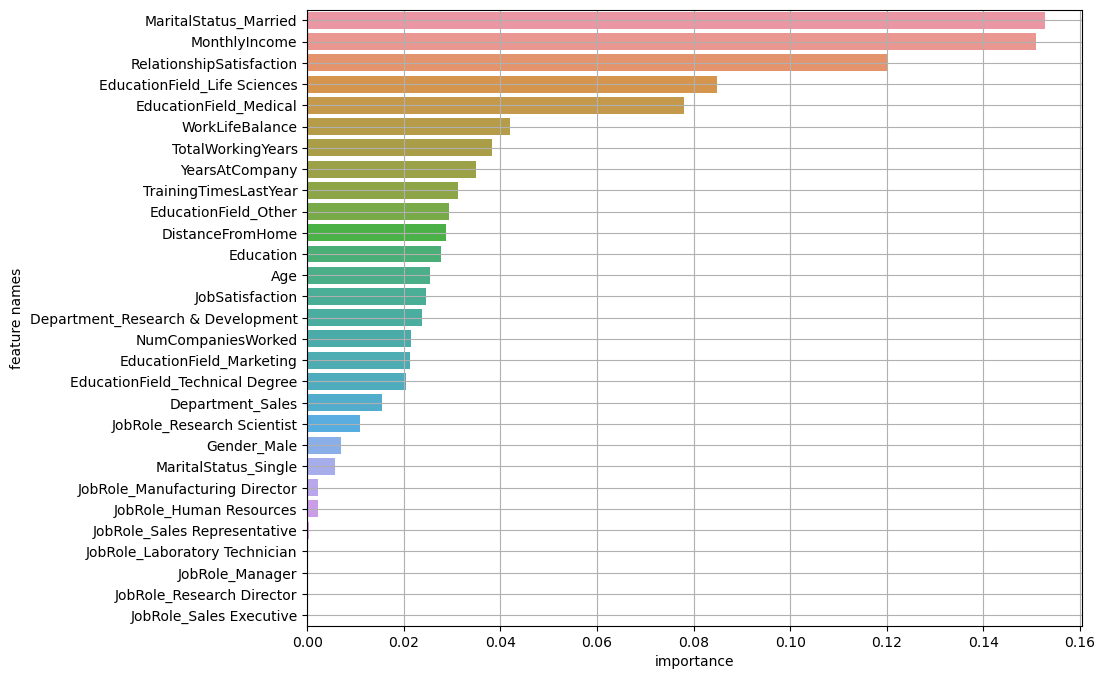

In [82]:
DT_result = plot_feature_importance(DT_best_model.feature_importances_, list(x_train))

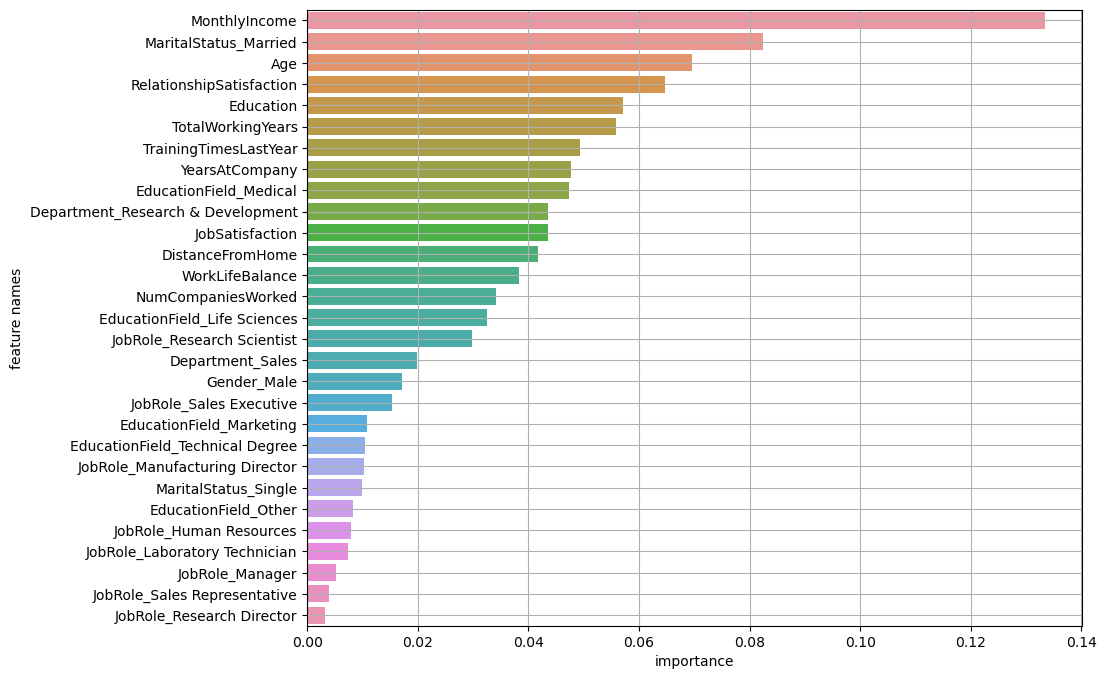

In [83]:
RF_result = plot_feature_importance(RF_model.feature_importances_, list(x_train))

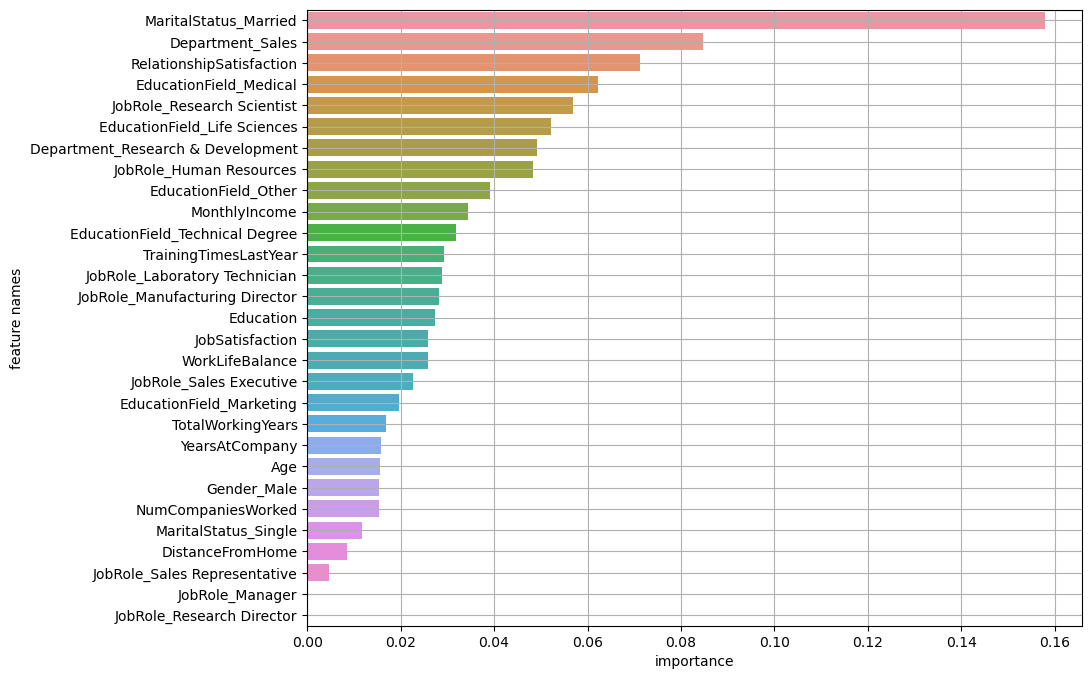

In [85]:
XGB_result = plot_feature_importance(XGB_best_model.feature_importances_, list(x_train))